In [1]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_csv('communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)

In [2]:
pos=df[(df['highCrime'] == 1)]
pos_percentage=len(pos)/len(df)
neg_percentage=1-pos_percentage
print('positive instance percentage is ',pos_percentage)
print('negative instance percentage is ',neg_percentage)

positive instance percentage is  0.6271951831409934
negative instance percentage is  0.37280481685900657


In [3]:
initial=pd.read_csv('communities-crime-clean.csv')

In [ ]:
from sklearn.model_selection import cross_val_score
#from sklearn import tree
initial=pd.read_csv('communities-crime-clean.csv')
initial = initial.drop('communityname', 1)
initial = initial.drop('ViolentCrimesPerPop', 1)
initial = initial.drop('fold', 1)
initial = initial.drop('state', 1)
Y = df['highCrime'] #dependent variable
list(initial)
feature_name=list(initial)

# LINEAR REGRESSION

In [5]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

lr = linear_model.LinearRegression(normalize=True) #lr model created and assigned
Y = df['ViolentCrimesPerPop']
predicted = cross_val_predict(lr, initial, Y, cv=10) #k fold cross validation and returns the predicted value for Y
print('10_fold_cv_MSE is ',mean_squared_error(Y, predicted))
y_pred = lr.fit(initial, Y).predict(initial) #predict for Y on training data

print('MSE on training set is ',mean_squared_error(Y, y_pred))  

# print('coef is ',lr.coef_)
#max and min coefficients of the lr model
min=np.min(lr.coef_)
print('min is ',min)
index_min = np.argmin(lr.coef_)
print(index_min)
max=np.max(lr.coef_)
print('max is ',max)
index_max = np.argmax(lr.coef_)
print(index_max)
print('coefficient[min] is ',feature_name[index_min]) #printing feature names of the coefficients

print('coefficient[max] is ',feature_name[index_max])

10_fold_cv_MSE is  0.020102698466732374
MSE on training set is  0.016516774880307172
min is  -0.675694478802864
67
max is  0.6350881164986146
64
coefficient[min] is  PctPersOwnOccup
coefficient[max] is  PersPerOccupHous


# RIDGE REGRESSION

In [6]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
# Using RidgeCV to reduce the amount of overfitting
ridge_model = RidgeCV(alphas=[10.0,1.0,0.1, 0.01, 0.001]) # value of alpha to be considered
# Alpha is a hyperparameter that controls the strength of the regularization term.
print(ridge_model)
ridge_reg_score = cross_val_predict(ridge_model, initial, Y, cv=10) # k fold cross validation
ridge_fit = ridge_model.fit(initial, Y) # to find best alpha
print('Best Alpha: ', ridge_model.alpha_)
ridge_predict = ridge_model.predict(initial) #predict for Y on training data
#accuracy of each Fold
print(ridge_reg_score)
#mean accuracy of 10 Folds
print(ridge_reg_score.mean())

#MSE 10 Fold CV
print('10_fold_cv_MSE is: ',mean_squared_error(Y, ridge_reg_score))

#MSE on the Training set
mse_ridge = np.mean((ridge_predict - Y) ** 2)
print ("Mean Square Error on training set: ", mse_ridge)

RidgeCV(alphas=array([1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03]))
Best Alpha:  1.0
[0.15629536 0.29723509 0.52328122 ... 0.09344901 0.16300833 0.16714695]
0.2370824211039448
10_fold_cv_MSE is:  0.019803952528777344
Mean Square Error on training set:  0.01676352915516944


# POLYNOMIAL REGRESSION

In [7]:
from sklearn.preprocessing import *
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pol = PolynomialFeatures(degree = 2) # polynomial features of independant variables
print(pol) # set to create 2nd degree polynomial features

lin_reg = LinearRegression()
pip = Pipeline([("polynomial Feature", pol),("linear_Regression", lin_reg)]) # a pipeline is created for combining lr and pr
poly_reg_score = cross_val_predict(pip, initial, Y, cv=10) # k fold cross validation
p_fit = pip.fit(initial, Y) # predict for Y on training data
p_predict = pip.predict(initial)
#accuracy of each fold
print(poly_reg_score)
#mean accuracy of 10 Folds
print(poly_reg_score.mean())

#MSE 10 Fold CV
print('10_fold_cv_MSE is ',mean_squared_error(Y, poly_reg_score))

#MSE on Training Set
mse_poly = np.mean((p_predict - Y) ** 2)
print ("Mean Square Error on training set: ", mse_poly)


PolynomialFeatures()
[ 0.54690115  0.53207759  0.32258761 ... -0.19221653  0.17287474
  0.40109198]
0.2357222906856665
10_fold_cv_MSE is  0.12995776839144918
Mean Square Error on training set:  8.843206757196274e-29


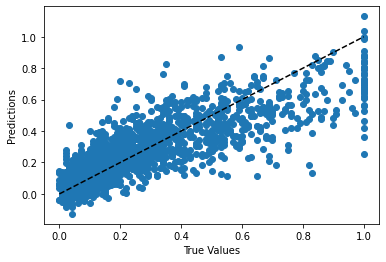

In [9]:
import matplotlib.pyplot as plt

plt.scatter(Y, y_pred)
plt.plot([0, 1], [0, 1], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

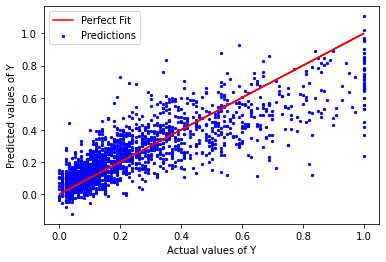

In [10]:
import matplotlib.pyplot as plt

plt.scatter(Y, ridge_predict, s=5, c='blue', label='Predictions')
plt.plot(Y, Y, color='red', label='Perfect Fit')
plt.xlabel('Actual values of Y')
plt.ylabel('Predicted values of Y')
plt.legend()
plt.show()


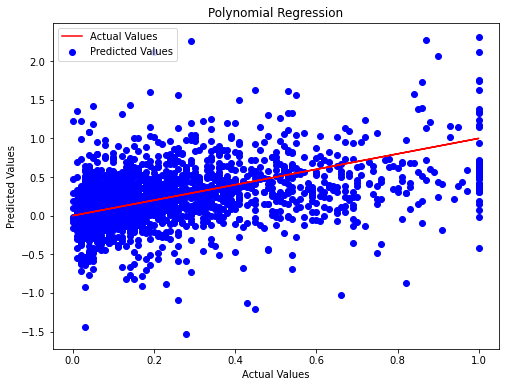

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(Y, poly_reg_score, color='blue', label='Predicted Values')
plt.plot(Y, Y, color='red', label='Actual Values')
plt.title('Polynomial Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(loc='upper left')
plt.show()
